In [86]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2021`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()




In [87]:
df1.shape

(1068744, 24)

In [88]:
df1.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag', 'rate_code', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'ehail_fee', 'airport_fee', 'total_amount', 'payment_type',
       'distance_between_service', 'time_between_service', 'trip_type',
       'imp_surcharge', 'pickup_location_id', 'dropoff_location_id',
       'data_file_year', 'data_file_month'],
      dtype='object')

In [89]:
df1.dtypes

vendor_id                                object
pickup_datetime             datetime64[ns, UTC]
dropoff_datetime            datetime64[ns, UTC]
store_and_fwd_flag                       object
rate_code                                object
passenger_count                           Int64
trip_distance                            object
fare_amount                              object
extra                                    object
mta_tax                                  object
tip_amount                               object
tolls_amount                             object
ehail_fee                                object
airport_fee                              object
total_amount                             object
payment_type                             object
distance_between_service                 object
time_between_service                      Int64
trip_type                                object
imp_surcharge                            object
pickup_location_id                      

In [90]:
df1.passenger_count.isna().sum()

412434

In [91]:
df1.dropna(subset=['passenger_count'], inplace=True)


In [92]:
df1 = df1[df1['passenger_count'] != 0]

In [93]:
df1.passenger_count.unique()

<IntegerArray>
[1, 2, 3, 5, 6, 4, 9, 8, 7, 32, 48]
Length: 11, dtype: Int64

In [94]:
df1 = df1[df1['passenger_count'] != 32]

In [95]:
df1 = df1[df1['passenger_count'] != 48]

In [96]:
df1.passenger_count.unique()

<IntegerArray>
[1, 2, 3, 5, 6, 4, 9, 8, 7]
Length: 9, dtype: Int64

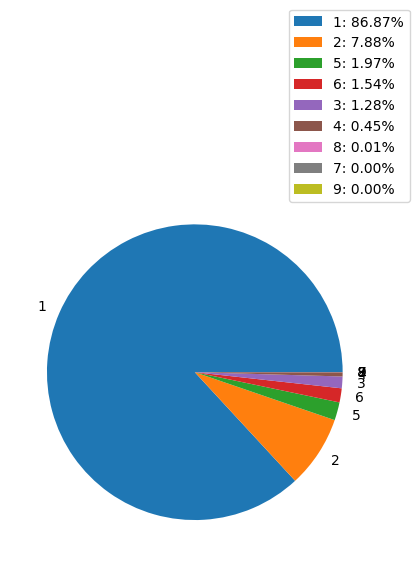

<Figure size 800x800 with 0 Axes>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data


# Get value counts for the column
value_counts = df1['passenger_count'].value_counts()

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(value_counts, labels=value_counts.index)
plt.figure(figsize=(8, 8))

# Add percentage values to legend
total = sum(value_counts)
vals = value_counts.values
labels = value_counts.index
percentages = ["{0:.2f}%".format(val/total*100) for val in vals]
legends = [f'{label}: {percentage}' for label, percentage in zip(labels, percentages)]
ax.legend(legends, loc="upper right",bbox_to_anchor=(1.1, 1.5))

plt.savefig('fare_by_hour.png', dpi=300, bbox_inches='tight')
plt.savefig('1.png', dpi=300, bbox_inches='tight')
plt.show()



In [98]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2021`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [99]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
zone = query_job.to_dataframe()


In [100]:
new_df = pd.DataFrame({
    'Pick-up': df1['pickup_location_id'],
    'Drop-off': df1['dropoff_location_id']
})
new_df

,Pick-up,Drop-off
0,193,193
1,42,42
2,193,193
3,193,193
4,95,134
...,...,...
1068739,82,223
1068740,55,137
1068741,71,188
1068742,55,228


In [101]:
zone['zone_id'].max()

'99'

In [102]:
zone['zone_name_borough'] = zone['zone_name'] + '-' + zone['borough']

# display merged dataframe
print(zone)

    zone_id                  zone_name        borough  \
0         1             Newark Airport            EWR   
1         3    Allerton/Pelham Gardens          Bronx   
2        18               Bedford Park          Bronx   
3        20                    Belmont          Bronx   
4        31                 Bronx Park          Bronx   
..      ...                        ...            ...   
258     206  Saint George/New Brighton  Staten Island   
259     214   South Beach/Dongan Hills  Staten Island   
260     221                  Stapleton  Staten Island   
261     245              West Brighton  Staten Island   
262     251                Westerleigh  Staten Island   

                                             zone_geom  \
0    POLYGON((-74.1856319999999 40.6916479999999, -...   
1    POLYGON((-73.848596761 40.8716707849999, -73.8...   
2    POLYGON((-73.8844286139999 40.8668003789999, -...   
3    POLYGON((-73.8839239579998 40.8644177609999, -...   
4    POLYGON((-73.8710017

In [103]:
zone.columns

Index(['zone_id', 'zone_name', 'borough', 'zone_geom', 'zone_name_borough'], dtype='object')

In [104]:
zone = zone.drop(columns=['zone_name', 'borough', 'zone_geom'])

In [105]:
zone.head()

,zone_id,zone_name_borough
0,1,Newark Airport-EWR
1,3,Allerton/Pelham Gardens-Bronx
2,18,Bedford Park-Bronx
3,20,Belmont-Bronx
4,31,Bronx Park-Bronx


In [106]:
merged_df = pd.merge(new_df, zone, how='left', left_on='Pick-up', right_on='zone_id')


In [107]:
merged_df

,Pick-up,Drop-off,zone_id,zone_name_borough
0,193,193,193,Queensbridge/Ravenswood-Queens
1,42,42,42,Central Harlem North-Manhattan
2,193,193,193,Queensbridge/Ravenswood-Queens
3,193,193,193,Queensbridge/Ravenswood-Queens
4,95,134,95,Forest Hills-Queens
...,...,...,...,...
1071593,82,223,82,Elmhurst-Queens
1071594,55,137,55,Coney Island-Brooklyn
1071595,71,188,71,East Flatbush/Farragut-Brooklyn
1071596,55,228,55,Coney Island-Brooklyn


In [108]:
merged_df = pd.merge(merged_df, zone, how='left', left_on='Drop-off', right_on='zone_id')

In [109]:
merged_df = merged_df.drop(columns=['zone_id_x', 'zone_id_y'])

In [110]:
new_names = {'zone_name_borough_x': 'Pick-up_location', 'zone_name_borough_y': 'Drop-off_location'}
location = merged_df.rename(columns=new_names)

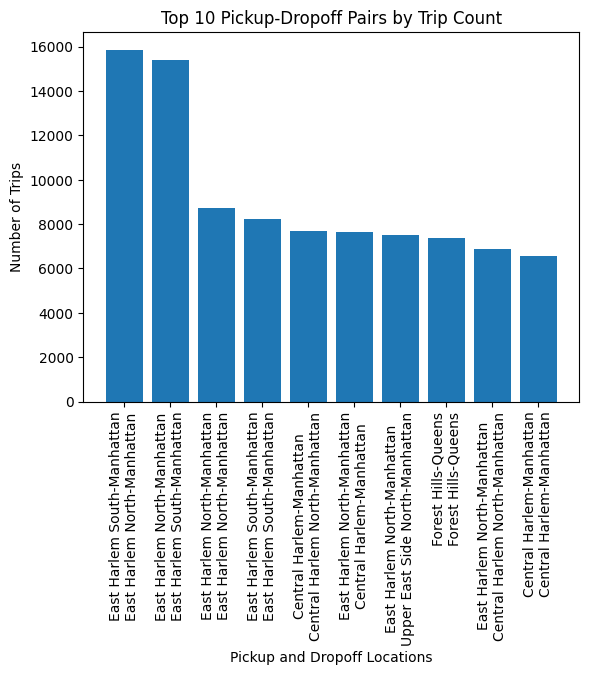

In [111]:
trip_counts = location.groupby(['Pick-up_location', 'Drop-off_location']).size().reset_index(name='count')

# Sort the trip counts in descending order
trip_counts = trip_counts.sort_values(by='count', ascending=False)

# Plot a bar chart of the top 10 pickup-dropoff pairs by trip count
top_pairs = trip_counts.head(10)
plt.bar(range(len(top_pairs)), top_pairs['count'])
plt.xticks(range(len(top_pairs)), [f"{pickup}\n{dropoff}" for pickup, dropoff in zip(top_pairs['Pick-up_location'], top_pairs['Drop-off_location'])])
plt.xlabel('Pickup and Dropoff Locations')
plt.ylabel('Number of Trips')
plt.title('Top 10 Pickup-Dropoff Pairs by Trip Count')
plt.xticks(rotation=90)
plt.savefig('2.png', dpi=300, bbox_inches='tight')
plt.show()

In [112]:
df1.time_between_service.isna()

0          True
1          True
2          True
3          True
4          True
           ... 
1068739    True
1068740    True
1068741    True
1068742    True
1068743    True
Name: time_between_service, Length: 1068744, dtype: bool

In [113]:
df1.trip_type.unique()

array(['1.0', '2.0', None], dtype=object)

In [114]:
df1.trip_type.nunique()

2

In [115]:
df1.fare_amount.min()

Decimal('-300.000000000')

In [116]:
df1.total_amount.min()

Decimal('-300.800000000')

In [117]:
df1.total_amount.max()

Decimal('2113.550000000')

In [118]:
df1.fare_amount.min()

Decimal('-300.000000000')

In [119]:
df1.passenger_count.min()

0

In [120]:
df1 = df1[df1['passenger_count'] != 0]

In [121]:
df1.passenger_count.unique()

<IntegerArray>
[1, 3, 2, 6, 4, 5, 7, 9, 8, 32, 48]
Length: 11, dtype: Int64

In [122]:
monthly_stats = df1.groupby('data_file_month').agg({'fare_amount': 'sum', 'passenger_count': 'sum'})

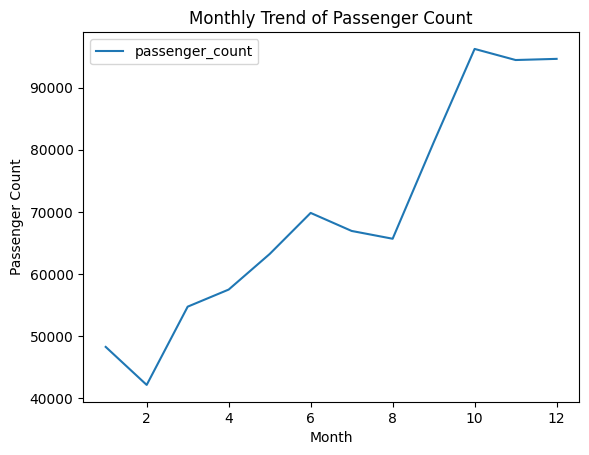

In [123]:
monthly_stats.plot(kind='line', y='passenger_count',legend=True)

plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.title('Monthly Trend of Passenger Count')
plt.savefig('3.png', dpi=300, bbox_inches='tight')
plt.show()

In [124]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2021`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [125]:
df1 = df1[df1['total_amount'] >= 0]


In [126]:
df1 = df1[df1['total_amount'] != 0E-9]

In [127]:
df1 = df1[df1['total_amount'] >= 1]

In [128]:
df1.total_amount.mean()

24.055149725810466

In [129]:
df1.data_file_month.unique()

<IntegerArray>
[2, 3, 9, 1, 8, 5, 7, 10, 6, 11, 12, 4]
Length: 12, dtype: Int64

In [130]:
monthly_stats = df1.groupby('data_file_month').agg({'fare_amount': 'sum'})

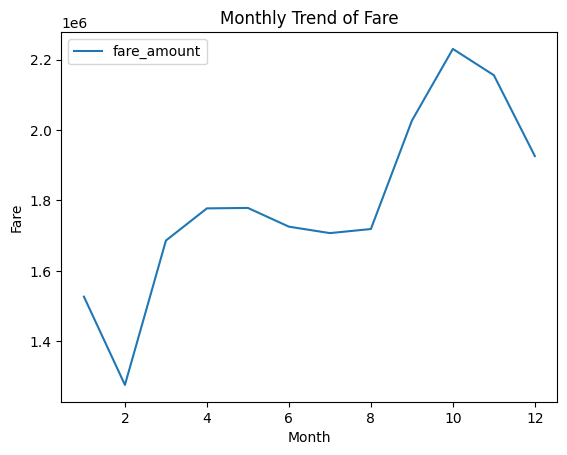

In [131]:
monthly_stats['fare_amount'] = pd.to_numeric(monthly_stats['fare_amount'], errors='coerce')
monthly_stats.plot(kind='line', y='fare_amount', legend=True)

plt.xlabel('Month')
plt.ylabel('Fare')
plt.title('Monthly Trend of Fare')
plt.savefig('4.png', dpi=300, bbox_inches='tight')
plt.show()

In [132]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2021`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [133]:
df1.pickup_datetime

0         2021-02-02 11:28:59+00:00
1         2021-02-02 15:11:53+00:00
2         2021-02-03 12:43:19+00:00
3         2021-02-03 12:44:27+00:00
4         2021-02-03 13:12:14+00:00
                     ...           
1068739   2021-04-07 19:22:00+00:00
1068740   2021-04-21 11:52:00+00:00
1068741   2021-04-08 08:15:00+00:00
1068742   2021-04-24 14:22:00+00:00
1068743   2021-04-12 14:54:00+00:00
Name: pickup_datetime, Length: 1068744, dtype: datetime64[ns, UTC]

In [134]:
import pandas as pd
from datetime import datetime

# Load the data into a pandas DataFrame
#df1 = pd.read_csv('your_file.csv')

# Convert the pickup_datetime column to a datetime object
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])

# Extract the pickup time as a separate column
df1['pickup_time'] = df1['pickup_datetime'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))

# Print the first few rows to verify the results
print(df1.head())

  vendor_id           pickup_datetime          dropoff_datetime  \
0         2 2021-02-02 11:28:59+00:00 2021-02-02 11:30:01+00:00   
1         1 2021-02-02 15:11:53+00:00 2021-02-02 18:43:58+00:00   
2         2 2021-02-03 12:43:19+00:00 2021-02-03 12:44:19+00:00   
3         2 2021-02-03 12:44:27+00:00 2021-02-03 12:45:17+00:00   
4         2 2021-02-03 13:12:14+00:00 2021-02-03 13:26:45+00:00   

  store_and_fwd_flag rate_code  passenger_count trip_distance fare_amount  \
0                  N       1.0                1          0E-9        0E-9   
1                  N       5.0                1  48.100000000        0E-9   
2                  N       1.0                1          0E-9        0E-9   
3                  N       1.0                1          0E-9        0E-9   
4                  N       1.0                1   2.580000000        0E-9   

  extra mta_tax  ... payment_type distance_between_service  \
0  0E-9    0E-9  ...          1.0                     None   
1  0E-9   

In [135]:
df1.head()

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,payment_type,distance_between_service,time_between_service,trip_type,imp_surcharge,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,pickup_time
0,2,2021-02-02 11:28:59+00:00,2021-02-02 11:30:01+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,1.0,None,<NA>,1.0,0E-9,193,193,2021,2,11:28:59
1,1,2021-02-02 15:11:53+00:00,2021-02-02 18:43:58+00:00,N,5.0,1,48.100000000,0E-9,0E-9,0E-9,...,2.0,None,<NA>,2.0,0E-9,83,10,2021,2,15:11:53
2,2,2021-02-03 12:43:19+00:00,2021-02-03 12:44:19+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,2.0,None,<NA>,1.0,0E-9,193,193,2021,2,12:43:19
3,2,2021-02-03 12:44:27+00:00,2021-02-03 12:45:17+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,1.0,None,<NA>,1.0,0E-9,193,193,2021,2,12:44:27
4,2,2021-02-03 13:12:14+00:00,2021-02-03 13:26:45+00:00,N,1.0,1,2.580000000,0E-9,0E-9,0E-9,...,2.0,None,<NA>,1.0,0E-9,95,130,2021,2,13:12:14


In [136]:
# Create a new column indicating if pickup_time is at night or during the day
df1['pickup_time_period'] = df1['pickup_datetime'].apply(lambda x: 'night' if ((x.hour >= 20) or (x.hour < 8)) else 'day')

# Print the first few rows to verify the results
print(df1.head())


  vendor_id           pickup_datetime          dropoff_datetime  \
0         2 2021-02-02 11:28:59+00:00 2021-02-02 11:30:01+00:00   
1         1 2021-02-02 15:11:53+00:00 2021-02-02 18:43:58+00:00   
2         2 2021-02-03 12:43:19+00:00 2021-02-03 12:44:19+00:00   
3         2 2021-02-03 12:44:27+00:00 2021-02-03 12:45:17+00:00   
4         2 2021-02-03 13:12:14+00:00 2021-02-03 13:26:45+00:00   

  store_and_fwd_flag rate_code  passenger_count trip_distance fare_amount  \
0                  N       1.0                1          0E-9        0E-9   
1                  N       5.0                1  48.100000000        0E-9   
2                  N       1.0                1          0E-9        0E-9   
3                  N       1.0                1          0E-9        0E-9   
4                  N       1.0                1   2.580000000        0E-9   

  extra mta_tax  ... distance_between_service time_between_service trip_type  \
0  0E-9    0E-9  ...                     None         

Average Fare Amount by Pickup Time Period:
pickup_time_period
day      20.063204
night    20.405869
Name: fare_amount, dtype: float64


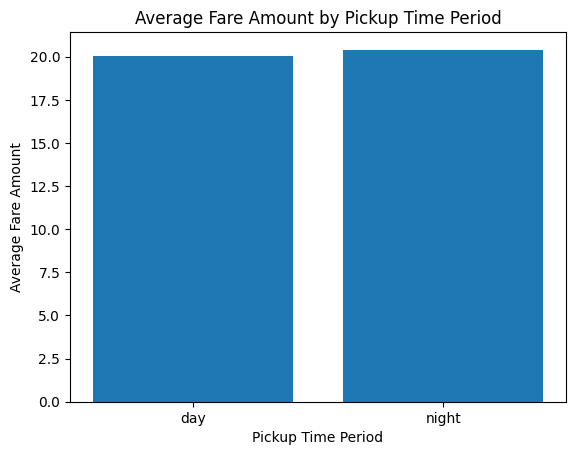

In [137]:
import matplotlib.pyplot as plt

# Calculate the average fare amount by pickup time period
fare_by_time_period = df1.groupby('pickup_time_period')['fare_amount'].mean()

# Print the average fare amount by pickup time period
print("Average Fare Amount by Pickup Time Period:")
print(fare_by_time_period)

# Create a bar plot of average fare amount by pickup time period
plt.bar(fare_by_time_period.index, fare_by_time_period.values)

# Set the plot title and axis labels
plt.title('Average Fare Amount by Pickup Time Period')
plt.xlabel('Pickup Time Period')
plt.ylabel('Average Fare Amount')
plt.savefig('5.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


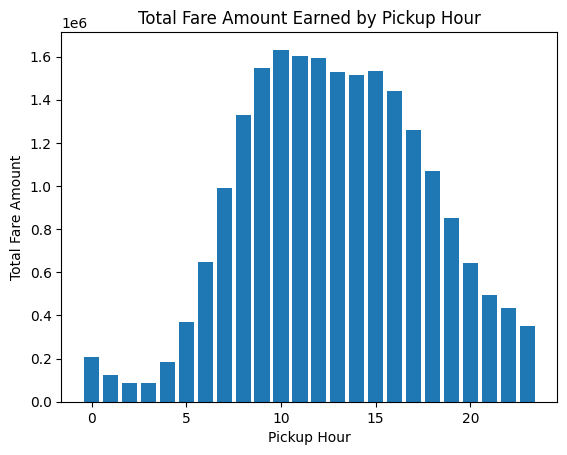

In [138]:
# Create a new column to extract the hour component of pickup_datetime
df1['pickup_hour'] = df1['pickup_datetime'].apply(lambda x: x.hour)

# Calculate the total fare amount earned for each pickup hour
fare_by_hour = df1.groupby('pickup_hour')['fare_amount'].sum()

# Create a bar plot of total fare amount earned by pickup hour
plt.bar(fare_by_hour.index, fare_by_hour.values)

# Set the plot title and axis labels
plt.title('Total Fare Amount Earned by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Fare Amount')


plt.savefig('6.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


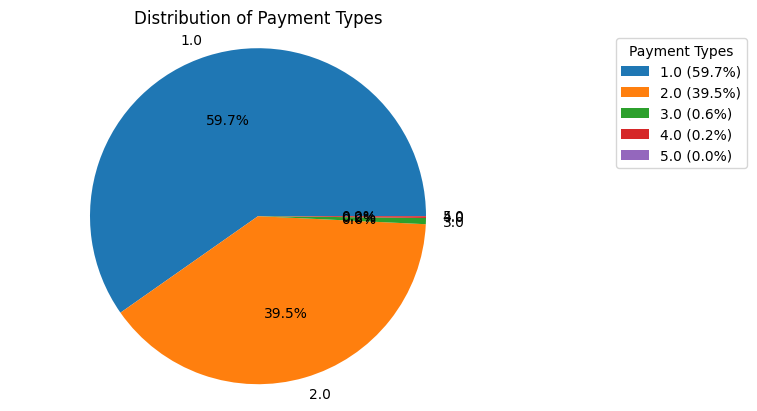

In [139]:
# Example code
import pandas as pd
import matplotlib.pyplot as plt

# Load NYC taxi fare data into a dataframe (replace 'filename.csv' with your actual filename)
#df = pd.read_csv('filename.csv')

# Count the number of occurrences of each payment type
payment_counts = df1['payment_type'].value_counts()

# Create a pie chart showing the distribution of payment types
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Types')

# Add a legend to the chart with percentage values
plt.legend(title='Payment Types', loc='best', bbox_to_anchor=(1, 0, 0.5, 1),
           labels=['{} ({:.1f}%)'.format(i,j*100/sum(payment_counts)) for i,j in payment_counts.items()])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('7.png', dpi=300, bbox_inches='tight')
plt.show()


In [140]:
df1.total_amount.max()

Decimal('2113.550000000')